In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
import matplotlib 
matplotlib.rcParams["figure.figsize"]=(20,10)

In [2]:
# load data 
df=pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
df.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [4]:
#To find rows and columns
df.shape

(13320, 9)

In [5]:
# to find all the columns
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [6]:
# to count the values we have for all the kind in columns
#output will be 
df["area_type"].value_counts() # output will be sorted according to numbers

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [7]:
# using group by
#df.groupby("area_type")["area_type"].agg('counts')
df.groupby("area_type")["area_type"].agg('count') # output will be alphbetically sorted

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [8]:
#we can drop unwanted columns
df2=df.drop(['area_type','society','balcony','availability'],axis='columns')

In [9]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [10]:
#checking is null values
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
df2.shape

(13320, 5)

In [12]:
df3=df2.dropna()

In [13]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [14]:
df3.shape

(13246, 5)

# Data enginnering(Feature engineering)

Always remember to remove null and None value before u apply any data enginnering method

In [15]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [16]:
# let's add a new variable in place of size having a consistent type of values
# making a new column bhk which have value as int taking form size column at 0 place
#df3['size']=df3["size"].astype('strings')
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

D:\Users\AKuma368\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [18]:
#to find  data typr of one columns
df3.size.dtype

dtype('int32')

In [19]:
# to find datatype of entire dataframe
df3.dtypes

location       object
size           object
total_sqft     object
bath          float64
price         float64
bhk             int64
dtype: object

In [20]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [21]:
#Analysing total_sqft variable
df3.total_sqft

0               1056
1               2600
2               1440
3               1521
4               1200
5               1170
6               2732
7               3300
8               1310
9               1020
10              1800
11              2785
12              1000
13              1100
14              2250
15              1175
16              1180
17              1540
18              2770
19              1100
20               600
21              1755
22              2800
23              1767
24               510
25              1250
26               660
27              1610
28              1151
29              1025
            ...     
13290           4050
13291            812
13292           1440
13293           2425
13294           2200
13295           1810
13296           1200
13297           1060
13298           1015
13299    2830 - 2882
13300           1500
13301           1454
13302           1075
13303            774
13304           1187
13305            500
13306        

In [22]:
# as in total sqft we can see we have some value as range (1234-1456). We must replace thos value with a mean value of this
# convert the variable to float first
def to_float(x):
    try:
        float(x)
    except:
        return False
    return True
    

In [23]:
#lets find the value in total_sqft not having float value
df3[~df3['total_sqft'].apply(to_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [24]:
# now clauculate the mean value
def to_calculate_mean(x):
    token= x.split('-')
    if len(token)==2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None
       

In [25]:
a='2100 - 2850	'
to_calculate_mean(a)

2475.0

In [26]:
#make a new dataframe to replace range value with its mean form total_sqft
df3['total_sqft']=df3['total_sqft'].apply(to_calculate_mean)
df3.head()

D:\Users\AKuma368\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [27]:
df3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

In [28]:
# calculate price per square foot price/totat_sqft
df3['price_sq_ft']=(df3.price*100000)/(df3.total_sqft)

D:\Users\AKuma368\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [29]:
df3.head(10)

,location,size,total_sqft,bath,price,bhk,price_sq_ft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [65]:
df3.shape

(13246, 7)

In [66]:
df4=df3.copy()

In [67]:
df4.shape

(13246, 7)

In [68]:
a=df4.price_sq_ft.min()

In [69]:
print(a)

267.82981328435875


In [88]:
filter= df4['price_sq_ft']==a
df4.where(filter,inplace=True)

In [89]:
df4.shape

(13246, 7)

In [90]:
df5=df4.dropna()

In [91]:
df5.shape

(1, 7)

In [92]:
df5.isnull().sum()

location       0
size           0
total_sqft     0
bath           0
price          0
bhk            0
price_sq_ft    0
dtype: int64

In [93]:
df4.head()

,location,size,total_sqft,bath,price,bhk,price_sq_ft
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_sq_ft
1894,Nelamangala,3 Bedroom,52272.0,2.0,140.0,3.0,267.829813


In [95]:
df3.head()

,location,size,total_sqft,bath,price,bhk,price_sq_ft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


# Analyse price_sq_ft value

In [96]:
df3['price_sq_ft'].describe()

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_sq_ft, dtype: float64

In [98]:
df3.shape

(13246, 7)

In [105]:
df3.location.value_counts()

Whitefield                                  534
Sarjapur  Road                              392
Electronic City                             302
Kanakpura Road                              266
Thanisandra                                 233
Yelahanka                                   210
Uttarahalli                                 186
Hebbal                                      176
Marathahalli                                175
Raja Rajeshwari Nagar                       171
Bannerghatta Road                           152
Hennur Road                                 150
7th Phase JP Nagar                          149
Haralur Road                                141
Electronic City Phase II                    131
Rajaji Nagar                                106
Chandapura                                   98
Bellandur                                    96
KR Puram                                     88
Hoodi                                        88
Electronics City Phase 1                

In [118]:
df3.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [120]:
df3.location.nunique() #counting unique value in a column

1304

In [121]:
df3.location.count() # count all non-null values

13246

In [126]:
location_count=df3.location.value_counts()

In [127]:
location_count

Whitefield                                  534
Sarjapur  Road                              392
Electronic City                             302
Kanakpura Road                              266
Thanisandra                                 233
Yelahanka                                   210
Uttarahalli                                 186
Hebbal                                      176
Marathahalli                                175
Raja Rajeshwari Nagar                       171
Bannerghatta Road                           152
Hennur Road                                 150
7th Phase JP Nagar                          149
Haralur Road                                141
Electronic City Phase II                    131
Rajaji Nagar                                106
Chandapura                                   98
Bellandur                                    96
KR Puram                                     88
Hoodi                                        88
Electronics City Phase 1                

In [110]:
location_count.values.sum() #location_count.sum()is also working ???

13246

In [111]:
type(location_count)

pandas.core.series.Series

In [112]:
# we can delete the value of location for which we have data less than 10 (This is Known as Dimension Reduction)
Count=location_count<=10

In [113]:
print(Count)

Whitefield                                  False
Sarjapur  Road                              False
Electronic City                             False
Kanakpura Road                              False
Thanisandra                                 False
Yelahanka                                   False
Uttarahalli                                 False
Hebbal                                      False
Marathahalli                                False
Raja Rajeshwari Nagar                       False
Bannerghatta Road                           False
Hennur Road                                 False
7th Phase JP Nagar                          False
Haralur Road                                False
Electronic City Phase II                    False
Rajaji Nagar                                False
Chandapura                                  False
Bellandur                                   False
KR Puram                                    False
Hoodi                                       False


In [114]:
len(Count) # count all the values in location_count

1304

In [115]:
len(location_count[location_count<=10]) #read seres propeties

1063

In [122]:
# see the value where location is less than 10
location_less_than_10=location_count[location_count<=10]

In [123]:
location_less_than_10

Kalkere                                     10
BTM 1st Stage                               10
Dairy Circle                                10
1st Block Koramangala                       10
Gunjur Palya                                10
Dodsworth Layout                            10
Naganathapura                               10
Nagadevanahalli                             10
Basapura                                    10
Nagappa Reddy Layout                        10
Sadashiva Nagar                             10
Ganga Nagar                                 10
2nd Phase JP Nagar                           9
Mathikere                                    9
Chandra Layout                               9
Kaverappa Layout                             9
Lingarajapuram                               9
Chennammana Kere                             9
Kamakshipalya                                9
Gollahalli                                   9
4th Block Koramangala                        9
Volagerekalla

In [125]:

len(df3.location.unique()) # counting Unique values

1304

In [128]:
#let place all this value as other
df3.location=df3.location.apply(lambda x: 'other' if x in location_less_than_10 else x)

D:\Users\AKuma368\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [129]:
df3.location.nunique() #count all the unique values after removeing less than 10 values location

242

# Removal of outliers

In [130]:
df3.shape #still the same value as we did not removed the loction value with less than 10 we just replaced it with other

(13246, 7)

In [132]:
#lets remove the rows for which total_sqft/bhk is less than 300
df6=df3[~(df3.total_sqft/df3.bhk<300)]

In [134]:
df6.shape

(12502, 7)

In [135]:
df6.head()

,location,size,total_sqft,bath,price,bhk,price_sq_ft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [136]:
df6.price_sq_ft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_sq_ft, dtype: float64

In [148]:
df6.head()

,location,size,total_sqft,bath,price,bhk,price_sq_ft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [156]:
#let us remove the outliers that is the value which is lying between min
for key,subdf in df6.groupby('location'):
    print("Printing value for key")
    print(key)
    print("Printing value for subdf")
    print(subdf)

Printing value for key
 Devarachikkanahalli
Printing value for subdf
                   location       size  total_sqft  bath  price  bhk  \
152     Devarachikkanahalli      3 BHK      1250.0   2.0   44.0    3   
341     Devarachikkanahalli      2 BHK      1250.0   2.0   40.0    2   
2474    Devarachikkanahalli  2 Bedroom      1200.0   2.0   83.0    2   
5030    Devarachikkanahalli      2 BHK      1170.0   2.0   40.0    2   
5536    Devarachikkanahalli  3 Bedroom      1200.0   3.0  160.0    3   
5771    Devarachikkanahalli      3 BHK      1425.0   2.0   65.0    3   
6591    Devarachikkanahalli      2 BHK       947.0   2.0   43.0    2   
7536    Devarachikkanahalli      2 BHK      1130.0   2.0   36.0    2   
7767    Devarachikkanahalli      3 BHK      1417.0   2.0   76.0    3   
8268    Devarachikkanahalli      2 BHK      1230.0   2.0   58.0    2   
8954    Devarachikkanahalli      3 BHK      1705.0   3.0   75.0    3   
9894    Devarachikkanahalli      2 BHK      1116.0   2.0   47.0    

13229  Ambedkar Nagar      3 BHK      2395.0   4.0  150.0    3   6263.048017
Printing value for key
Amruthahalli
Printing value for subdf
           location       size  total_sqft  bath  price  bhk   price_sq_ft
471    Amruthahalli      2 BHK       900.0   2.0   40.0    2   4444.444444
1273   Amruthahalli      2 BHK      1200.0   2.0   55.0    2   4583.333333
1370   Amruthahalli      2 BHK      4400.0   3.0  475.0    2  10795.454545
2014   Amruthahalli  3 Bedroom      1900.0   3.0  135.0    3   7105.263158
2466   Amruthahalli      2 BHK       924.0   2.0   45.0    2   4870.129870
3341   Amruthahalli      2 BHK       900.0   2.0   60.0    2   6666.666667
4212   Amruthahalli      2 BHK      1100.0   2.0   45.0    2   4090.909091
4324   Amruthahalli      2 BHK      1200.0   2.0   55.0    2   4583.333333
5263   Amruthahalli      3 BHK      1350.0   2.0   63.0    3   4666.666667
6981   Amruthahalli  3 Bedroom      1200.0   5.0  200.0    3  16666.666667
7081   Amruthahalli      3 BHK      1

Printing value for subdf
           location       size  total_sqft  bath   price  bhk   price_sq_ft
553    Banashankari      3 BHK      1200.0   2.0   42.00    3   3500.000000
737    Banashankari      2 BHK      1077.0   2.0   37.64    2   3494.893222
1081   Banashankari      3 BHK      1470.0   2.0   88.64    3   6029.931973
1193   Banashankari      3 BHK      1300.0   2.0   75.00    3   5769.230769
1986   Banashankari      3 BHK      1800.0   3.0  115.00    3   6388.888889
2195   Banashankari      2 BHK      1125.0   2.0   63.00    2   5600.000000
2312   Banashankari      3 BHK      1340.0   2.0   53.60    3   4000.000000
2343   Banashankari      2 BHK      1310.0   2.0   80.00    2   6106.870229
2608   Banashankari  4 Bedroom      2400.0   3.0  370.00    4  15416.666667
2951   Banashankari      3 BHK      2600.0   4.0  135.00    3   5192.307692
2984   Banashankari      3 BHK      1900.0   2.0  170.00    3   8947.368421
3016   Banashankari      2 BHK      1260.0   2.0   75.00    2  

13252  Bhoganhalli  3 BHK      1703.0   3.0  120.00    3  7046.388726
Printing value for key
Billekahalli
Printing value for subdf
           location       size  total_sqft  bath   price  bhk   price_sq_ft
376    Billekahalli      3 BHK      1935.0   3.0  110.00    3   5684.754522
416    Billekahalli      2 BHK      1125.0   2.0   62.00    2   5511.111111
1310   Billekahalli      3 BHK      1650.0   3.0   88.00    3   5333.333333
1392   Billekahalli      2 BHK      1090.0   2.0   52.00    2   4770.642202
2605   Billekahalli      2 BHK      1112.0   2.0   62.00    2   5575.539568
4036   Billekahalli      2 BHK      1140.0   2.0   50.00    2   4385.964912
6251   Billekahalli  3 Bedroom      2400.0   3.0  150.00    3   6250.000000
6437   Billekahalli      3 BHK      2968.0   3.0  225.00    3   7580.862534
6905   Billekahalli      2 BHK      1350.0   3.0   55.00    2   4074.074074
7927   Billekahalli      2 BHK       950.0   2.0   58.11    2   6116.842105
10607  Billekahalli      2 BHK   

13204  Dasanapura      2 BHK       814.0   2.0   43.70    2  5368.550369
Printing value for key
Dasarahalli
Printing value for subdf
          location       size  total_sqft  bath   price  bhk  price_sq_ft
215    Dasarahalli      2 BHK      1295.0   2.0   65.00    2  5019.305019
1151   Dasarahalli      3 BHK      1520.0   2.0   75.00    3  4934.210526
1479   Dasarahalli      2 BHK      1300.0   2.0   55.00    2  4230.769231
2261   Dasarahalli      3 BHK      1901.0   3.0  119.00    3  6259.863230
4104   Dasarahalli      2 BHK      1150.0   2.0   70.00    2  6086.956522
4340   Dasarahalli  7 Bedroom      2400.0   3.0  150.00    7  6250.000000
5065   Dasarahalli      3 BHK      2100.0   3.0  120.00    3  5714.285714
5986   Dasarahalli      2 BHK      1300.0   2.0   50.00    2  3846.153846
6562   Dasarahalli  3 Bedroom      2400.0   2.0  152.00    3  6333.333333
7514   Dasarahalli      2 BHK      1220.0   2.0   52.00    2  4262.295082
7815   Dasarahalli      2 BHK      1375.0   2.0   60.

        location       size  total_sqft  bath   price  bhk  price_sq_ft
13     Gottigere      2 BHK      1100.0   2.0   40.00    2  3636.363636
580    Gottigere      2 BHK       967.0   2.0   45.00    2  4653.567735
606    Gottigere      2 BHK       891.0   2.0   25.00    2  2805.836139
785    Gottigere      3 BHK      1618.0   3.0   82.50    3  5098.887515
796    Gottigere      2 BHK      1222.0   2.0   63.00    2  5155.482815
1876   Gottigere  2 Bedroom      1200.0   2.0   95.00    2  7916.666667
2009   Gottigere      3 BHK      1600.0   2.0   55.00    3  3437.500000
2390   Gottigere      3 BHK      1300.0   3.0   65.00    3  5000.000000
2515   Gottigere      2 BHK       950.0   2.0   38.00    2  4000.000000
2574   Gottigere      2 BHK      1153.0   2.0   48.50    2  4206.418040
2866   Gottigere  1 Bedroom       812.0   1.0   26.00    1  3201.970443
3195   Gottigere  4 Bedroom      2000.0   4.0   82.00    4  4100.000000
3372   Gottigere      3 BHK      1460.0   2.0   65.00    3  4452

[83 rows x 7 columns]
Printing value for key
Horamavu Agara
Printing value for subdf
             location       size  total_sqft  bath   price  bhk  price_sq_ft
255    Horamavu Agara  4 Bedroom     1200.00   2.0   95.00    4  7916.666667
658    Horamavu Agara      2 BHK     1200.00   2.0   45.00    2  3750.000000
1054   Horamavu Agara      3 BHK     1560.00   3.0   75.00    3  4807.692308
1185   Horamavu Agara      3 BHK     1453.00   2.0   46.48    3  3198.898830
1406   Horamavu Agara      2 BHK      755.00   2.0   37.49    2  4965.562914
1422   Horamavu Agara      2 BHK      982.00   2.0   47.65    2  4852.342159
1651   Horamavu Agara      3 BHK     1650.00   2.0   75.00    3  4545.454545
1803   Horamavu Agara      2 BHK      950.00   2.0   39.00    2  4105.263158
2149   Horamavu Agara      2 BHK     1170.00   2.0   38.00    2  3247.863248
2685   Horamavu Agara      3 BHK     1756.00   3.0   92.00    3  5239.179954
3774   Horamavu Agara      2 BHK     1106.00   2.0   43.09    2  389

[68 rows x 7 columns]
Printing value for key
Jalahalli
Printing value for subdf
        location       size  total_sqft  bath    price  bhk   price_sq_ft
379    Jalahalli      3 BHK      1400.0   3.0   77.000    3   5500.000000
631    Jalahalli      3 BHK      2250.0   3.0  160.000    3   7111.111111
777    Jalahalli      2 BHK      1694.0   2.0  150.000    2   8854.781582
1097   Jalahalli      5 BHK      3100.0   4.0  265.000    5   8548.387097
1518   Jalahalli      2 BHK      1694.0   2.0  125.000    2   7378.984652
1814   Jalahalli      3 BHK      1870.0   3.0  110.000    3   5882.352941
1990   Jalahalli      2 BHK      1400.0   1.0   80.000    2   5714.285714
2507   Jalahalli      2 BHK      1045.0   2.0   76.770    2   7346.411483
2754   Jalahalli      2 BHK      1478.0   2.0  125.000    2   8457.374831
3318   Jalahalli      3 BHK      1615.0   3.0   89.750    3   5557.275542
3371   Jalahalli      2 BHK      1083.0   2.0   32.490    2   3000.000000
3820   Jalahalli      3 BHK     

[264 rows x 7 columns]
Printing value for key
Kannamangala
Printing value for subdf
           location       size  total_sqft  bath   price  bhk  price_sq_ft
151    Kannamangala      2 BHK       957.0   2.0   58.00    2  6060.606061
1276   Kannamangala      2 BHK       957.0   2.0   56.00    2  5851.619645
1380   Kannamangala      3 BHK      1550.0   3.0   65.00    3  4193.548387
2309   Kannamangala  4 Bedroom      3000.0   4.0  200.00    4  6666.666667
2550   Kannamangala      2 BHK      1235.0   2.0   43.63    2  3532.793522
2601   Kannamangala      3 BHK      1536.0   3.0   89.00    3  5794.270833
3574   Kannamangala      2 BHK      1262.0   2.0   55.00    2  4358.161648
3639   Kannamangala  4 Bedroom      2400.0   4.0  130.00    4  5416.666667
3968   Kannamangala      3 BHK      1574.0   3.0   93.34    3  5930.114358
6487   Kannamangala      2 BHK       957.0   2.0   52.50    2  5485.893417
8262   Kannamangala      3 BHK      1536.0   3.0  104.00    3  6770.833333
8526   Kannamang

[63 rows x 7 columns]
Printing value for key
Kudlu
Printing value for subdf
      location   size  total_sqft  bath   price  bhk  price_sq_ft
756      Kudlu  2 BHK      1152.0   2.0   53.50    2  4644.097222
2573     Kudlu  2 BHK      1027.0   2.0   43.00    2  4186.952288
2970     Kudlu  2 BHK      1092.0   2.0   44.00    2  4029.304029
3825     Kudlu  2 BHK      1027.0   2.0   43.00    2  4186.952288
3951     Kudlu  2 BHK      1092.0   2.0   44.00    2  4029.304029
4784     Kudlu  2 BHK      1143.0   2.0   55.00    2  4811.898513
5768     Kudlu  3 BHK      1455.0   2.0   60.00    3  4123.711340
5957     Kudlu  3 BHK      1293.0   2.0   85.00    3  6573.859242
6748     Kudlu  2 BHK      1024.0   2.0   44.00    2  4296.875000
7372     Kudlu  3 BHK      1570.0   2.0   65.94    3  4200.000000
7503     Kudlu  3 BHK      1600.0   3.0   79.00    3  4937.500000
7683     Kudlu  2 BHK      1027.0   2.0   42.00    2  4089.581305
9009     Kudlu  2 BHK      1076.0   2.0   50.00    2  4646.840149


          location       size  total_sqft  bath    price  bhk  price_sq_ft
15     Mysore Road      2 BHK     1175.00   2.0   73.500    2  6255.319149
150    Mysore Road      3 BHK     1710.00   4.0   91.310    3  5339.766082
585    Mysore Road      2 BHK     1020.00   2.0   48.950    2  4799.019608
628    Mysore Road      2 BHK     1200.00   2.0   85.000    2  7083.333333
994    Mysore Road      2 BHK     1175.00   2.0   73.500    2  6255.319149
1127   Mysore Road      2 BHK     1070.00   2.0   45.000    2  4205.607477
1289   Mysore Road      2 BHK     1239.00   2.0   53.000    2  4277.643261
1640   Mysore Road      2 BHK     1060.00   2.0   62.000    2  5849.056604
1746   Mysore Road      2 BHK      980.00   2.0   45.470    2  4639.795918
2025   Mysore Road      2 BHK      883.00   2.0   40.000    2  4530.011325
2791   Mysore Road      3 BHK     1525.00   3.0   96.000    3  6295.081967
2837   Mysore Road      2 BHK     1200.00   2.0   65.000    2  5416.666667
2920   Mysore Road      2

13310  Rachenahalli  2 BHK      1050.0   2.0   52.71    2  5020.000000
Printing value for key
Raja Rajeshwari Nagar
Printing value for subdf
                    location       size  total_sqft  bath   price  bhk  \
17     Raja Rajeshwari Nagar      3 BHK      1540.0   3.0   60.00    3   
33     Raja Rajeshwari Nagar      3 BHK      1693.0   3.0   57.39    3   
262    Raja Rajeshwari Nagar      2 BHK      1295.0   2.0   43.90    2   
390    Raja Rajeshwari Nagar      2 BHK      1145.0   2.0   45.79    2   
433    Raja Rajeshwari Nagar      2 BHK      1419.0   2.0   48.10    2   
450    Raja Rajeshwari Nagar      2 BHK      1295.0   2.0   55.47    2   
607    Raja Rajeshwari Nagar      2 BHK      1133.0   2.0   49.07    2   
616    Raja Rajeshwari Nagar      2 BHK      1090.0   2.0   42.00    2   
659    Raja Rajeshwari Nagar      2 BHK      1260.0   2.0   67.39    2   
667    Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   38.55    2   
728    Raja Rajeshwari Nagar  4 Bedroom      

Printing value for subdf
          location       size  total_sqft  bath  price  bhk  price_sq_ft
301    Singasandra      2 BHK      1010.0   2.0   29.5    2  2920.792079
637    Singasandra      3 BHK      1440.0   2.0   65.0    3  4513.888889
1452   Singasandra      2 BHK      1030.0   2.0   55.0    2  5339.805825
1574   Singasandra  4 Bedroom      3850.0   6.0  195.0    4  5064.935065
2284   Singasandra  2 Bedroom       600.0   2.0   36.5    2  6083.333333
2393   Singasandra      2 BHK      1100.0   2.0   52.0    2  4727.272727
2643   Singasandra      3 BHK      1306.0   2.0   58.0    3  4441.041348
2767   Singasandra      4 BHK      3366.0   4.0  120.0    4  3565.062389
3572   Singasandra      2 BHK      1300.0   2.0   65.0    2  5000.000000
3630   Singasandra      4 BHK      3126.0   4.0  120.0    4  3838.771593
4710   Singasandra      3 BHK      1464.0   3.0   56.0    3  3825.136612
5239   Singasandra      2 BHK      1010.0   2.0   40.0    2  3960.396040
6806   Singasandra      2 

           location       size  total_sqft  bath   price  bhk  price_sq_ft
691    Varthur Road      2 BHK      1083.0   2.0   61.75    2  5701.754386
759    Varthur Road  4 Bedroom      2760.0   4.0  155.00    4  5615.942029
2436   Varthur Road      2 BHK       900.0   2.0   27.00    2  3000.000000
2639   Varthur Road      3 BHK      1655.0   3.0  115.00    3  6948.640483
5195   Varthur Road  4 Bedroom      1300.0   3.0   75.00    4  5769.230769
5374   Varthur Road      2 BHK       805.5   2.0   19.33    2  2399.751707
5744   Varthur Road      2 BHK      1277.0   2.0   59.00    2  4620.203602
6167   Varthur Road      3 BHK      1247.0   2.0   58.00    3  4651.162791
6724   Varthur Road      2 BHK      1050.0   2.0   42.70    2  4066.666667
7888   Varthur Road      2 BHK      1255.0   2.0   52.76    2  4203.984064
8179   Varthur Road      3 BHK      1033.0   2.0   30.47    3  2949.661181
8531   Varthur Road      2 BHK      1033.0   2.0   32.00    2  3097.773475
8724   Varthur Road      

In [154]:
df6.location.nunique()

242

In [164]:
#removing outliers for price per sq ft for each location
def remove_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df6.groupby('location'):
        mean=np.mean(subdf.price_sq_ft)  # calculating mean value of price_sq_ft for each location type
        sd_dev=np.std(subdf.price_sq_ft) # calculating standard deviation for each location type
        reduced_df=subdf[(subdf.price_sq_ft>(mean-sd_dev)) & (subdf.price_sq_ft<=(mean+sd_dev))] #Only  having value betwee mean-stdev and mean+stdev
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [165]:
# let apply the above function in dataframe
df7=remove_outliers(df6)

In [166]:
df7.shape

(10244, 7)

In [175]:
df7.shape[0]

10244

# Lets check for 2bhk and 3bhk how does price vary

In [173]:
# creating a function to create scatter plot for 2BHK and 3BHK for given location 
def scatter_plot_for_location(df,location):
    bhk2= df[(df.location==location) & (df.bhk==2)] #bhk2 is a dataframe where location= given loaction and BHK =2
    bhk3= df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3BHK',s=50)
    plt.xlabel('total square per fit')
    plt.ylabel('Price in lakhs')
    plt.title(location)
    plt.legend()

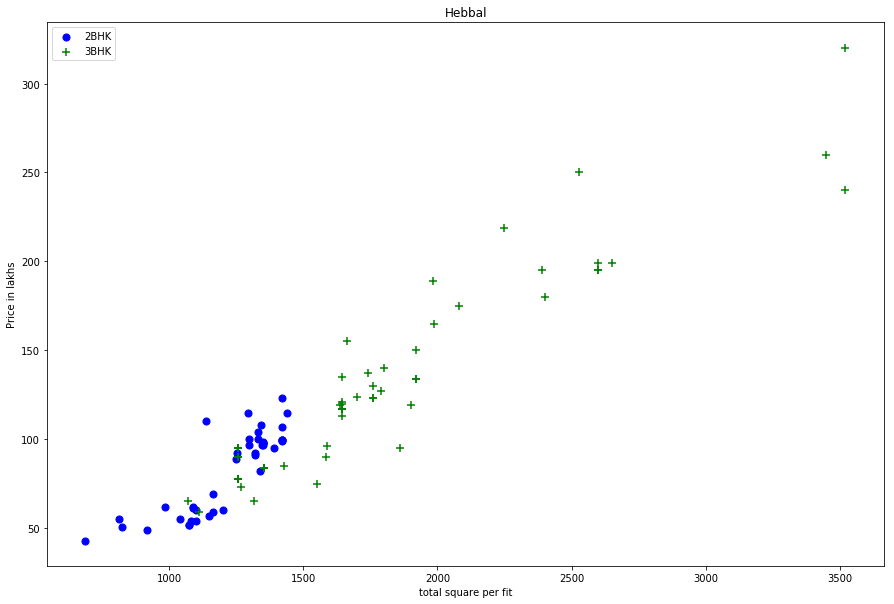

In [174]:
scatter_plot_for_location(df7,'Hebbal')

 Now we can see that the price of 2bhk(blue dot) is more than 3bhk(green+) from the plot. so we need to clean such data

Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment for the same location

bhk_stats ={
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}

In [231]:
def remove_bhk_outliers(df):
    exclude_index=np.array([]) # array to store tyhe index value of all excluded dataset
    for location , location_df in df.groupby('location'):
        bhk_stats={} # dictionary that stores the meta data of item as shown above
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                
                'mean':np.mean(bhk_df.price_sq_ft),
                'stdv':np.std(bhk_df.price_sq_ft),
                'count':bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5: # check if we have ant value in stats abd this count is greater than 5
                exclude_index=np.append(exclude_index,bhk_df[bhk_df.price_sq_ft<(stats['mean'])].index.values)
    return df.drop(exclude_index,axis='index')
                                                             

In [233]:
df8=remove_bhk_outliers(df7)

In [234]:
df8.shape

(7342, 7)

In [235]:
df7.shape

(10244, 7)

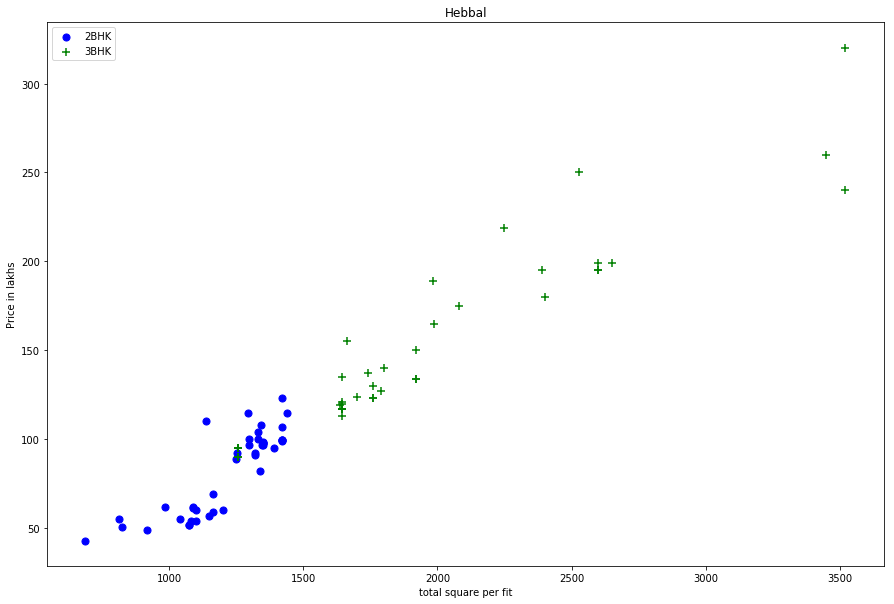

In [238]:
scatter_plot_for_location(df8,'Hebbal')

In [230]:
doc={1:'A',2:'B',3:'C'}
doc.get(2-1)

'A'

In [209]:
df7[(df7.location=='Whitefield')].index.values

array([7159, 7160, 7161, 7162, 7163, 7164, 7165, 7166, 7167, 7168, 7169,
       7170, 7171, 7172, 7173, 7174, 7175, 7176, 7177, 7178, 7179, 7180,
       7181, 7182, 7183, 7184, 7185, 7186, 7187, 7188, 7189, 7190, 7191,
       7192, 7193, 7194, 7195, 7196, 7197, 7198, 7199, 7200, 7201, 7202,
       7203, 7204, 7205, 7206, 7207, 7208, 7209, 7210, 7211, 7212, 7213,
       7214, 7215, 7216, 7217, 7218, 7219, 7220, 7221, 7222, 7223, 7224,
       7225, 7226, 7227, 7228, 7229, 7230, 7231, 7232, 7233, 7234, 7235,
       7236, 7237, 7238, 7239, 7240, 7241, 7242, 7243, 7244, 7245, 7246,
       7247, 7248, 7249, 7250, 7251, 7252, 7253, 7254, 7255, 7256, 7257,
       7258, 7259, 7260, 7261, 7262, 7263, 7264, 7265, 7266, 7267, 7268,
       7269, 7270, 7271, 7272, 7273, 7274, 7275, 7276, 7277, 7278, 7279,
       7280, 7281, 7282, 7283, 7284, 7285, 7286, 7287, 7288, 7289, 7290,
       7291, 7292, 7293, 7294, 7295, 7296, 7297, 7298, 7299, 7300, 7301,
       7302, 7303, 7304, 7305, 7306, 7307, 7308, 73

In [211]:
df7.loc[7631]

location       Whitefield
size                1 BHK
total_sqft            613
bath                    1
price                  48
bhk                     1
price_sq_ft       7830.34
Name: 7631, dtype: object

In [239]:
df8.head()

,location,size,total_sqft,bath,price,bhk,price_sq_ft
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.0,3,4561.403509
5,Devarachikkanahalli,2 BHK,947.0,2.0,43.0,2,4540.654699


Text(0, 0.5, 'Count')

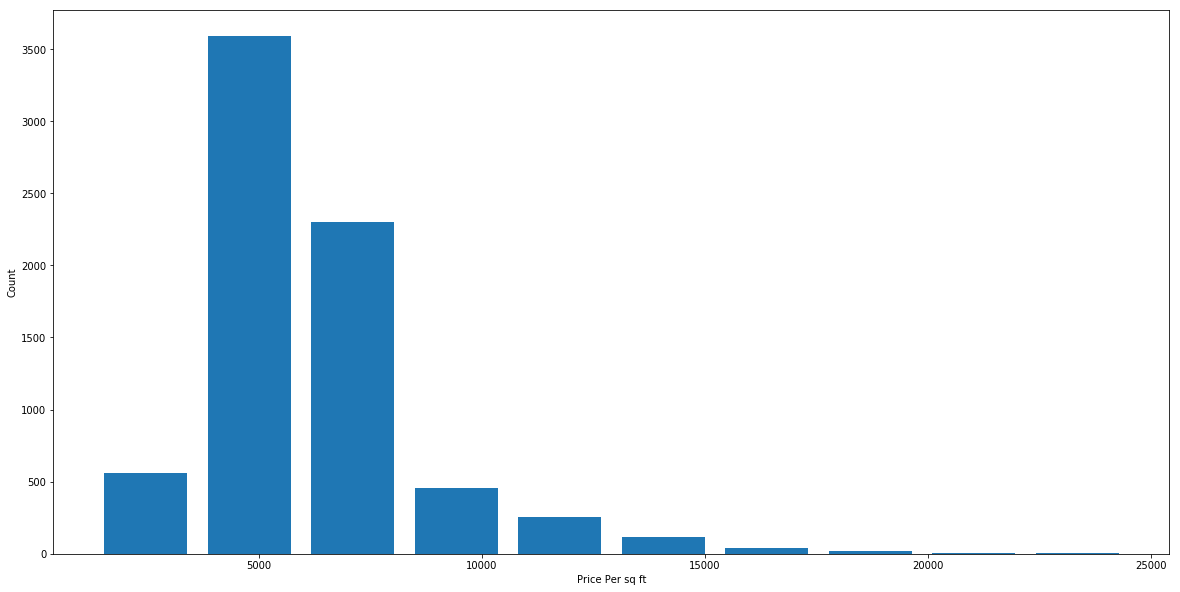

In [244]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df8.price_sq_ft,rwidth=0.8)
plt.xlabel('Price Per sq ft')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

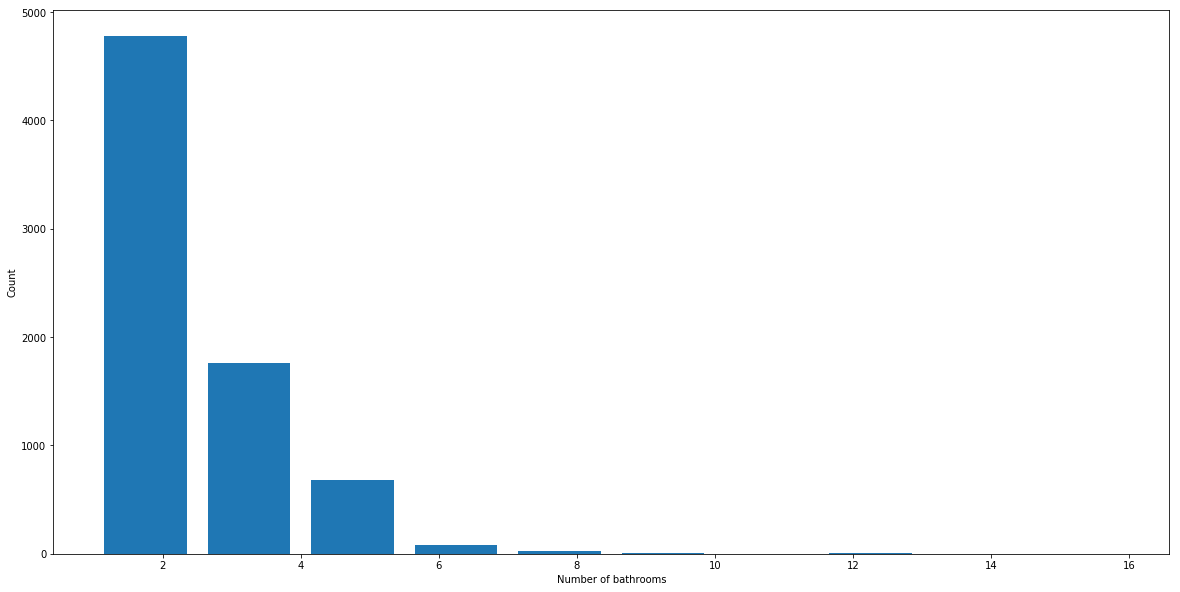

In [245]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

# Bathroom greater than number of room +2 is not normal so we remove those values

In [246]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_sq_ft
1637,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5232,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6702,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8405,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


Lets remove this

In [247]:
df9=df8[df8.bath<df8.bhk+2]

In [248]:
df9

,location,size,total_sqft,bath,price,bhk,price_sq_ft
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.00,2,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.00,2,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.00,2,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.00,3,4561.403509
5,Devarachikkanahalli,2 BHK,947.0,2.0,43.00,2,4540.654699
6,Devarachikkanahalli,2 BHK,1130.0,2.0,36.00,2,3185.840708
7,Devarachikkanahalli,3 BHK,1417.0,2.0,76.00,3,5363.443896
8,Devarachikkanahalli,2 BHK,1230.0,2.0,58.00,2,4715.447154
9,Devarachikkanahalli,3 BHK,1705.0,3.0,75.00,3,4398.826979
10,Devarachikkanahalli,2 BHK,1116.0,2.0,47.00,2,4211.469534


lets drop some unwanted column in order to build a model

In [251]:
df10=df9.drop(['size','price_sq_ft'],axis='columns')

In [252]:
df10.head()

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,43.0,2


# Use One Hot Encoding For Location

In [255]:
pd.get_dummies(df10.location)

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Changing location to numeric variable as categorical value is not easy to analyze

In [257]:
dummies=pd.get_dummies(df10.location)
dummies.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [261]:
df11=pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')

In [262]:
df11.head()

,location,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,83.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2.0,65.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,947.0,2.0,43.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [263]:
df12=df11.drop('location',axis='columns')

Lets begin the model

In [265]:
X=df12.drop('price',axis='columns')
X.head()

,total_sqft,bath,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [274]:
y=df12.price

In [275]:
y.head()

1    40.0
2    83.0
3    40.0
4    65.0
5    43.0
Name: price, dtype: float64

In [276]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [278]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(X_train,y_train)
linear.score(X_test,y_test)

0.7696224927820908

In [281]:
prediction=linear.predict(X_test)

In [284]:
from sklearn.metrics import r2_score
r2_score(y_test,prediction)

0.7696224927820908